In [2]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import dataframe_image as dfi
import os
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [3]:
# Definiciones del script

# Directorio de imagenes
dirImg = './imagenes'



# CSV
csv1 = './dataGrande.csv'
#csv1 = './data.csv'

In [13]:
# Obtenemos los datos del archivo CSV para un dataset
dataset1 = pd.read_csv(csv1, sep=';')

print("Total rows: {0}".format(len(dataset1)))
dataset1.tail()

Total rows: 3230


,TamanoMatriz,Procesos,Tiempo
3225,9900,64,0.685974
3226,10100,64,0.723549
3227,10300,64,0.739540
3228,10500,64,0.766620
3229,10700,64,0.790309


In [5]:
# Obtenemos los valores unicos de la columna Procesos y N
Procesos = dataset1['Procesos'].unique()
tam = dataset1['TamanoMatriz'].unique()

Procesos = sorted(Procesos)
tam = sorted(tam)

datasetsByCore = []

for p in Procesos:
	for n in tam:
		datasetsByCore.append(dataset1[(dataset1['Procesos'] == p) & (dataset1['TamanoMatriz'] == n)])

print("Valid: " + str(len(Procesos) * len(tam) == len(datasetsByCore)))


Valid: True


In [6]:
finalData = []

min_Procesos = dataset1['Procesos'].min()

ref_dataset = dataset1[dataset1['Procesos'] == min_Procesos]

ref_times = ref_dataset.groupby('TamanoMatriz')['Tiempo'].max()

for (TamañoMatriz_value, Procesos_value), group in dataset1.groupby(['TamanoMatriz', 'Procesos']):

	max_time = group['Tiempo'].max()

	ref_time = ref_times.get(TamañoMatriz_value, None)

	if ref_time and max_time:
		speedup = ref_time / max_time
		efficiency = speedup / (Procesos_value-1) if Procesos_value != 0 else 0
	else:
		speedup = None
		efficiency = None

	finalData.append([Procesos_value, TamañoMatriz_value, max_time, ref_time, speedup, efficiency])


final_df = pd.DataFrame(finalData, columns=['Procesos', 'TamanoMatriz', 'TiempoMaximo', 'TiempoReferencia', 'Speedup', 'Eficiencia'])

display(final_df)
# Filtrar el DataFrame para 64 procesos
procesos_64 = final_df[final_df['Procesos'] == 64]

# Mostrar los resultados
display(procesos_64)


,Procesos,TamanoMatriz,TiempoMaximo,TiempoReferencia,Speedup,Eficiencia
0,2,100,0.030475,0.030475,1.000000,1.000000
1,4,100,0.034634,0.030475,0.879916,0.293305
2,6,100,0.035004,0.030475,0.870615,0.174123
3,10,100,0.031452,0.030475,0.968937,0.107660
4,12,100,0.020125,0.030475,1.514286,0.137662
...,...,...,...,...,...,...
3225,56,20100,2.553447,3.711202,1.453409,0.026426
3226,58,20100,2.560214,3.711202,1.449567,0.025431
3227,60,20100,2.553171,3.711202,1.453566,0.024637
3228,62,20100,2.561022,3.711202,1.449110,0.023756


,Procesos,TamanoMatriz,TiempoMaximo,TiempoReferencia,Speedup,Eficiencia
30,64,100,0.102127,0.030475,0.298403,0.004737
62,64,300,0.090492,0.032561,0.359822,0.005711
94,64,500,0.116096,0.035365,0.304619,0.004835
126,64,700,0.104827,0.037052,0.353459,0.005610
158,64,900,0.103540,0.039416,0.380684,0.006043
...,...,...,...,...,...,...
3101,64,19300,2.421651,3.409726,1.408017,0.022349
3133,64,19500,2.452504,3.481538,1.419585,0.022533
3165,64,19700,2.523752,3.559923,1.410568,0.022390
3197,64,19900,2.559830,3.627292,1.417005,0.022492


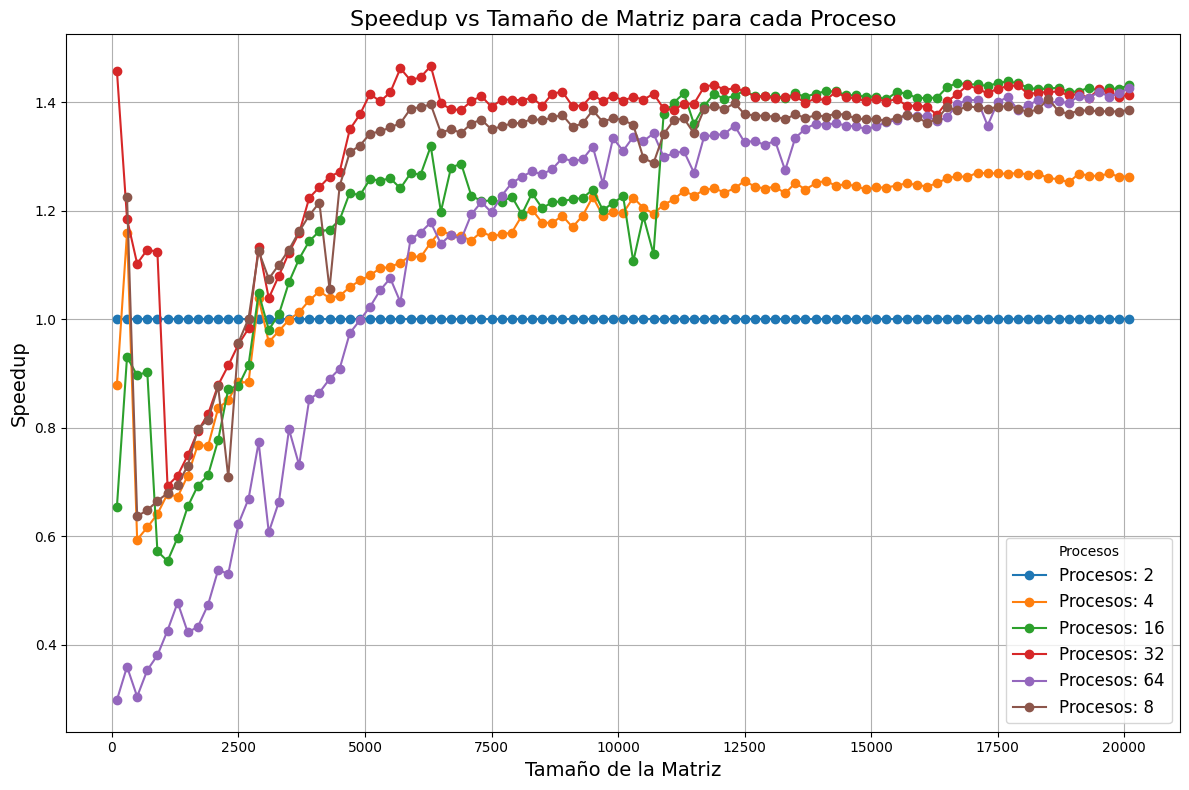

In [7]:
# Filtrar el DataFrame para eliminar tamaños de matriz menores a 100
filtered_df = final_df[(final_df['TamanoMatriz'] >= 100) & (final_df['Procesos'] > 0)]

# Función para verificar si un número es potencia de 2
def is_power_of_two(n):
    return (n & (n - 1)) == 0

# Filtrar procesos que sean potencias de 2
filtered_df = filtered_df[filtered_df['Procesos'].apply(is_power_of_two)]

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Grafica una línea para cada valor único en 'Procesos'
for proceso in filtered_df['Procesos'].unique():
    # Filtra los datos para el proceso actual
    proceso_df = filtered_df[filtered_df['Procesos'] == proceso]
    # Ordena los datos por TamanoMatriz (opcional, pero recomendado para gráficos claros)
    proceso_df = proceso_df.sort_values(by='TamanoMatriz')
    # Grafica la línea
    plt.plot(proceso_df['TamanoMatriz'], proceso_df['Speedup'], marker='o', label=f'Procesos: {proceso}')

# Agregar título, etiquetas y leyenda
plt.title('Speedup vs Tamaño de Matriz para cada Proceso', fontsize=16)
plt.xlabel('Tamaño de la Matriz', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.legend(title='Procesos', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
# Ajustamos algun dato que falle

# prevOne = final_df.loc[(final_df['Process'] == 43) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]
# nextOne = final_df.loc[(final_df['Process'] == 45) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]

# final_df.loc[(final_df['Process'] == 44) & (final_df['nTrap'] == 1), 'Efficiency'] = (prevOne + nextOne) / 2

# prevOne = final_df.loc[(final_df['Process'] == 7) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]
# nextOne = final_df.loc[(final_df['Process'] == 9) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]

# final_df.loc[(final_df['Process'] == 8) & (final_df['nTrap'] == 1), 'Efficiency'] = (prevOne + nextOne) / 2

In [9]:
# Filtrar el DataFrame para eliminar los valores de 'Procesos' impares
filtered_df = final_df[final_df['Procesos'] % 2 == 0]

# Crear la matriz de eficiencia usando el DataFrame filtrado
efficiency_matrix = filtered_df.pivot(index='Procesos', columns='TamanoMatriz', values='Eficiencia')
efficiency_matrix

TamanoMatriz,100,300,500,700,900,1100,1300,1500,1700,1900,...,18300,18500,18700,18900,19100,19300,19500,19700,19900,20100
Procesos,,,,,,,,,,,,,,,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.293305,0.386582,0.198057,0.205488,0.213755,0.226176,0.224253,0.237390,0.256381,0.255432,...,0.422867,0.420032,0.419550,0.417519,0.422777,0.421697,0.421385,0.422967,0.420944,0.421094
6,0.174123,0.171464,0.113192,0.106005,0.119540,0.113174,0.119798,0.119054,0.126030,0.133601,...,0.267606,0.265239,0.266153,0.265805,0.266172,0.265358,0.266484,0.266229,0.270319,0.264142
8,NaN,0.175082,0.091038,0.092599,0.095060,0.097077,0.099308,0.104362,0.113967,0.116449,...,0.198184,0.200978,0.197644,0.197004,0.197768,0.197892,0.197595,0.197665,0.197541,0.198079
10,0.107660,0.092058,0.113650,0.063201,0.071584,0.075836,0.078880,0.084307,0.089442,0.092669,...,0.156780,0.156089,0.155804,0.155429,0.155936,0.155902,0.156522,0.156259,0.156577,0.156859
12,0.137662,0.074034,0.096942,0.057373,0.058594,0.060257,0.061715,0.064924,0.068769,0.068136,...,0.128887,0.128320,0.128486,0.128406,0.128498,0.128170,0.128795,0.128876,0.128722,0.128932
14,0.069479,0.077370,0.079145,0.048814,0.049533,0.054498,0.052365,0.057809,0.060070,0.057995,...,0.108944,0.109566,0.108850,0.108509,0.109188,0.109263,0.108776,0.109364,0.108779,0.109123
16,0.043619,0.062048,0.059791,0.060222,0.038175,0.036962,0.039851,0.043675,0.046239,0.047516,...,0.094945,0.095043,0.095109,0.094630,0.094661,0.095157,0.094757,0.095046,0.094977,0.095518
18,0.044984,0.063939,0.041565,0.060346,0.039670,0.033217,0.042202,0.036421,0.041633,0.045922,...,0.084702,0.084262,0.084300,0.084336,0.084492,0.084408,0.084816,0.084457,0.084426,0.084551


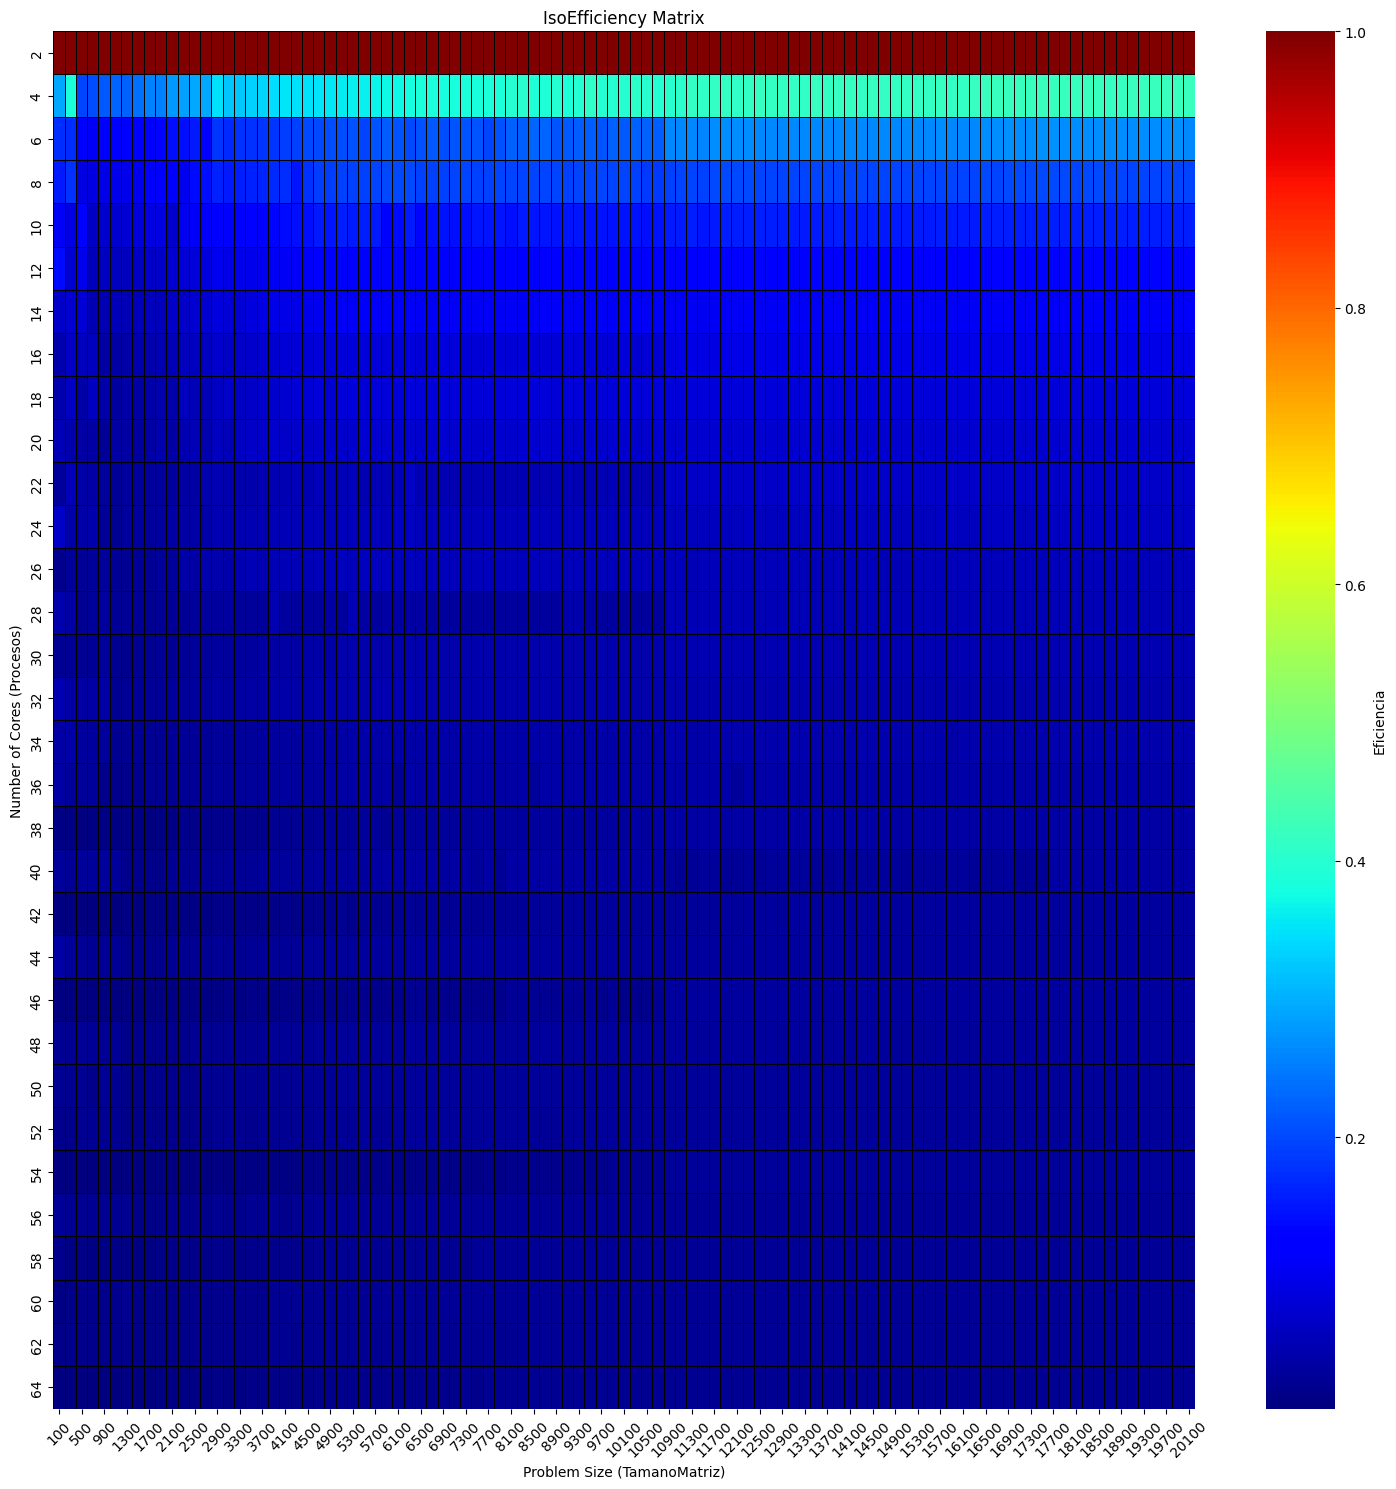

In [10]:
# Filtrar el DataFrame para eliminar los valores de 'Procesos' impares y 'TamanoMatriz' mayores a 4951
filtered_df = final_df[(final_df['Procesos'] % 2 == 0) & (final_df['TamanoMatriz'] > 1)]

# Crear la matriz de eficiencia usando el DataFrame filtrado
efficiency_matrix = filtered_df.pivot(index='Procesos', columns='TamanoMatriz', values='Eficiencia')

# Eliminar las columnas (TamanoMatriz) que no tienen datos (todos los valores NaN)
efficiency_matrix = efficiency_matrix.dropna(axis=1, how='all')

# Rellenar valores NaN con el promedio de los vecinos circundantes
def fill_with_neighbors(matrix):
    filled_matrix = matrix.copy()
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if np.isnan(filled_matrix.iloc[i, j]):
                # Calcular la media de los vecinos existentes
                neighbors = []
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < matrix.shape[0] and 0 <= nj < matrix.shape[1]:
                        neighbors.append(matrix.iloc[ni, nj])
                # Rellenar con la media si hay vecinos válidos
                if neighbors:
                    filled_matrix.iloc[i, j] = np.nanmean(neighbors)
    return filled_matrix

# Aplicar el relleno
efficiency_matrix = fill_with_neighbors(efficiency_matrix)

# Configura el tamaño de la figura
plt.figure(figsize=(15, 15))

# Usar el heatmap de Seaborn (sin anotaciones)
ax = sns.heatmap(efficiency_matrix, annot=False, fmt=".4f", cmap='jet', cbar_kws={'label': 'Eficiencia'}, linewidths=0.5, linecolor='black')

# Agregar títulos y etiquetas
ax.set_title("IsoEfficiency Matrix")
ax.set_xlabel("Problem Size (TamanoMatriz)")
ax.set_ylabel("Number of Cores (Procesos)")

# Rotación de las etiquetas de eje X para mayor claridad
plt.xticks(rotation=45)

# Guardar y mostrar la figura
plt.tight_layout()
plt.savefig(f'{dirImg}/iso_efficiency_matrix.png')
plt.show()

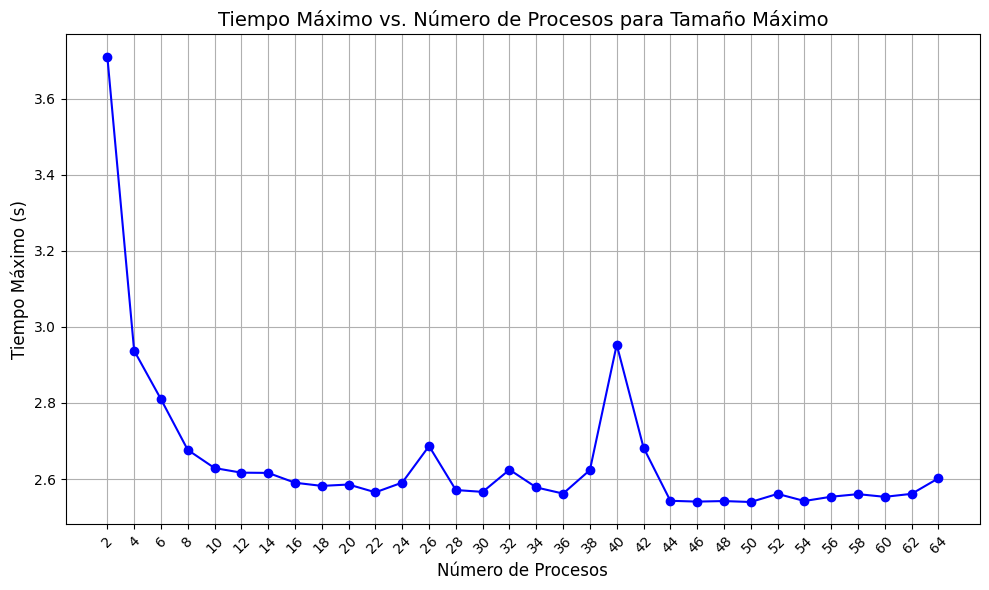

20100

In [ ]:
# Agrupar por número de procesos y calcular el tiempo máximo para cada grupo
procesos_vs_tiempo = final_df.groupby('Procesos')['TiempoMaximo'].max()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(procesos_vs_tiempo.index, procesos_vs_tiempo.values, marker='o', linestyle='-', color='b')

# Personalización de la gráfica
plt.title('Tiempo Máximo vs. Número de Procesos para Tamaño Máximo', fontsize=14)
plt.xlabel('Número de Procesos', fontsize=12)
plt.ylabel('Tiempo Máximo (s)', fontsize=12)
plt.grid(True)
plt.xticks(procesos_vs_tiempo.index, rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
